In [88]:
import seaborn as sea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols


# read correlation data and convey it into pandas dataframe
model_types=['SM','SM','SM','SM','STM','STM','STM','STM']
models = ['pca300_ridge','pca300_cca30','ica300_ridge','ica300_cca30',\
    'ica100_ridge','pca300_ridge','pca300_cca30','cca30_ridge'] # 1st line-SM, 2nd-STM
subjects = ['sub-01','sub-02','sub-03']#,'sub-04']
data=[]

# order of looping matters!
for model in range(len(models)):
    for subject in range(len(subjects)):
        dat=joblib.load(os.path.join('/data/akitaitsev/data1/decoding_data5/', model_types[model],\
            models[model], subjects[subject], ('correlations_spectr_'+str(subjects[subject])+'.pkl')))
        
        # check if there are 0 correlations
        inds = np.where(np.isclose(dat, np.zeros_like(dat))) 
        if not len(inds[0])==0:
            print('model ',str(model),'\n subject ',str(subject))
        data.append(dat)
assert [data[0].shape == el.shape for el in data]
pnts4subj = data[0].shape[0]
data=np.concatenate(data, axis=0)



In [89]:
# create long format data table
models = ['pca300_ridge','pca300_cca30','ica300_ridge','ica300_cca30',\
    'Ica100_ridge','Pca300_ridge','Pca300_cca30','Cca30_ridge']
subjects_ = [np.tile(el,pnts4subj) for el in subjects]
subjects_= np.concatenate(subjects_)
subjects_=subjects_.tolist()*len(models)
models_=[np.tile(el, pnts4subj*len(subjects)) for el in models]
models_=np.concatenate(models_)
model_types_=[np.tile(el,pnts4subj*len(subjects)) for el in model_types]
model_types_=np.concatenate(model_types_)
data= {'model':models_, 'model_type':model_types_, 'subject':subjects_,'data':data}

df = pd.DataFrame.from_dict(data)


In [63]:
print(df.head())

              model model_type subject      data
0  pca100_ridge0.99         SM  sub-01  0.952594
1  pca100_ridge0.99         SM  sub-01  0.956301
2  pca100_ridge0.99         SM  sub-01  0.938137
3  pca100_ridge0.99         SM  sub-01  0.977118
4  pca100_ridge0.99         SM  sub-01  0.180708


In [65]:
df2=df.pivot_table(index=df.index, columns=['model_type','model','subject'], values='data')
df2.head()

model_type           SM                                           \
model      ica300_cca30               ica300_ridge                 
subject          sub-01 sub-02 sub-03       sub-01 sub-02 sub-03   
0                   NaN    NaN    NaN          NaN    NaN    NaN   
1                   NaN    NaN    NaN          NaN    NaN    NaN   
2                   NaN    NaN    NaN          NaN    NaN    NaN   
3                   NaN    NaN    NaN          NaN    NaN    NaN   
4                   NaN    NaN    NaN          NaN    NaN    NaN   

model_type                                              ...         STM  \
model      pca100_ridge0.99               pca300_cca30  ... cca30_ridge   
subject              sub-01 sub-02 sub-03       sub-01  ...      sub-03   
0                  0.952594    NaN    NaN          NaN  ...         NaN   
1                  0.956301    NaN    NaN          NaN  ...         NaN   
2                  0.938137    NaN    NaN          NaN  ...         NaN   
3                  0.977118    NaN    NaN          NaN  ...         NaN   
4                  0.180708    NaN    NaN          NaN  ...         NaN   

model_type                                                                     \
model      ica100_ridge               pca300_cca30               pca300_ridge   
subject          sub-01 sub-02 sub-03       sub-01 sub-02 sub-03       sub-01   
0                   NaN    NaN    NaN          NaN    NaN    NaN          NaN   
1                   NaN    NaN    NaN          NaN    NaN    NaN          NaN   
2                   NaN    NaN    NaN          NaN    NaN    NaN          NaN   
3                   NaN    NaN    NaN          NaN    NaN    NaN          NaN   
4                   NaN    NaN    NaN          NaN    NaN    NaN          NaN   

model_type                
model                     
subject    sub-02 sub-03  
0             NaN    NaN  
1             NaN    NaN  
2             NaN    NaN  
3             NaN    NaN  
4             NaN    NaN  

[5 rows x 27 columns]

In [81]:
df['subject']

0        sub-01
1        sub-01
2        sub-01
3        sub-01
4        sub-01
          ...  
95992    sub-03
95993    sub-03
95994    sub-03
95995    sub-03
95996    sub-03
Name: subject, Length: 95997, dtype: object

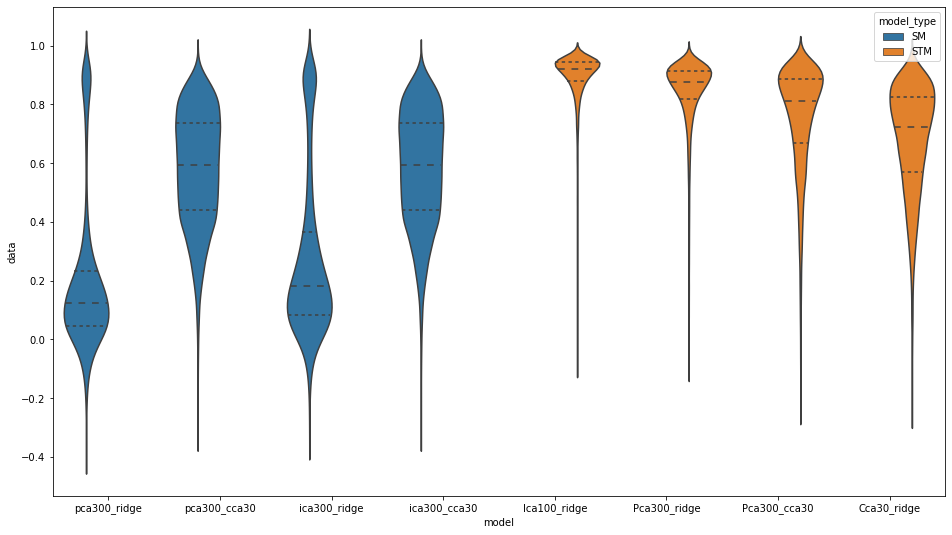

In [90]:
fig, ax = plt.subplots(figsize=(16,9))
sea.violinplot(ax=ax, x='model',y='data', hue='model_type', kind='violin',inner='quartile',hue_order=['SM','STM'],data=df)